In [24]:
# from cdlib.algorithms import louvain
# from cdlib import evaluation
import networkx as nx
from ema_workbench import load_results
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from ema_workbench.analysis import pairs_plotting
from ema_workbench.analysis import feature_scoring
from ema_workbench.em_framework.salib_samplers import get_SALib_problem
from ema_workbench import RealParameter, IntegerParameter, ScalarOutcome, Constant, Model
from SALib.analyze import sobol
import pickle
import seaborn as sns


In [25]:
# g = nx.karate_club_graph()
# communities = louvain(g)
# print(type(communities))
# print(communities.communities)
# mod = evaluation.modularity_overlap(g, communities)
# print("Overlapping modularity:", mod.score)

# Metrics for communities
# https://cdlib.readthedocs.io/en/v0.2.2/reference/evaluation.html
# Tutorial
# https://colab.research.google.com/github/KDDComplexNetworkAnalysis/CNA_Tutorials/blob/master/CDlib_tutorial.ipynb#scrollTo=3iPbWABt9sj7

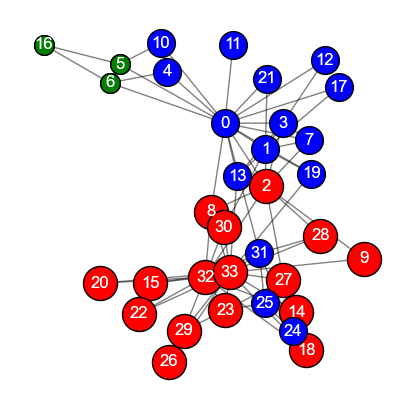

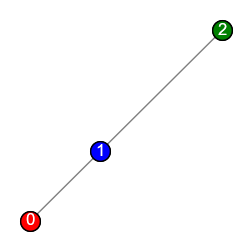

In [26]:
from cdlib import algorithms
from cdlib import viz

g = nx.karate_club_graph()
lp_coms = algorithms.label_propagation(g)

pos = nx.spring_layout(g)
viz.plot_network_clusters(g, lp_coms, pos, figsize=(5, 5), plot_overlaps=True, plot_labels=True) #, top_k=2)
viz.plot_community_graph(g, lp_coms, figsize=(3, 3), plot_overlaps=False, plot_labels=True)
plt.show()

In [27]:
# viz.plot_com_properties_relation([leiden_coms, lp_coms], evaluation.size, evaluation.internal_edge_density)
# from cdlib import evaluation

# g = nx.karate_club_graph()

# lp_coms = algorithms.label_propagation(g)
# #leiden_coms = algorithms.leiden(g)
# wp_coms = algorithms.walktrap(g)
# infomap_coms = algorithms.infomap(g)

# viz.plot_sim_matrix([lp_coms, wp_coms, infomap_coms], evaluation.adjusted_mutual_information)
# plt.show()

In [28]:
#filename = './jpetstore/jpetstore_128scenarios_nopolicies_sobol' #.tar.gz'
filename = './cargo/cargo_128scenarios_nopolicies_sobol' #.tar.gz'


experiments_df, outcomes = load_results(filename+ '.tar.gz')
experiments_df['beta'] = 100 - experiments_df['alpha']
outcomes_df = pd.DataFrame(outcomes)
print(experiments_df.shape, outcomes_df.shape)

with open(filename+'_model.pkl', 'rb') as input:
    uncertainties_problem = pickle.load(input)
with open(filename+'_partitions.pkl', 'rb') as input:
    partitions_dict = pickle.load(input)
    print(len(partitions_dict.keys()), "clusters")

(1280, 8) (1280, 3)
1220 clusters


In [29]:
experiments_df.head()

,alpha,mfuzzy,microservice_threshold,resolution,scenario,policy,model,beta
0,94,5,2,52,0,NaN,cargo,6
1,98,5,2,52,1,NaN,cargo,2
2,94,3,2,52,2,NaN,cargo,6
3,94,5,4,52,3,NaN,cargo,6
4,94,5,2,36,4,NaN,cargo,6


In [30]:
experiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1280 entries, 0 to 1279
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   alpha                   1280 non-null   int64   
 1   mfuzzy                  1280 non-null   int64   
 2   microservice_threshold  1280 non-null   int64   
 3   resolution              1280 non-null   int64   
 4   scenario                1280 non-null   category
 5   policy                  0 non-null      category
 6   model                   1280 non-null   category
 7   beta                    1280 non-null   int64   
dtypes: category(3), int64(5)
memory usage: 97.6 KB


In [31]:
experiments_df.describe()

,alpha,mfuzzy,microservice_threshold,resolution,beta
count,1280.000000,1280.000000,1280.000000,1280.000000,1280.000000
mean,50.492188,6.003906,5.996094,50.515625,49.507812
std,28.873831,2.587783,2.578703,28.882492,28.873831
min,1.000000,2.000000,2.000000,1.000000,0.000000
25%,25.750000,4.000000,4.000000,25.750000,24.750000
50%,50.500000,6.000000,6.000000,50.500000,49.500000
75%,75.250000,8.000000,8.000000,75.250000,74.250000
max,100.000000,10.000000,10.000000,100.000000,99.000000


In [32]:
outcomes

{'n_partitions': array([25, 25, 25, ..., 22, 22, 22]),
 'modularity': array([0.00497939, 0.00497939, 0.00515127, ..., 0.02148582, 0.04547852,
        0.04885022]),
 'noise_classes': array([53, 53, 53, ..., 61, 54, 54])}

In [33]:
outcomes_df.head()

,n_partitions,modularity,noise_classes
0,25,0.004979,53
1,25,0.004979,53
2,25,0.005151,53
3,26,0.011359,53
4,22,0.005686,53


In [34]:
outcomes_df.describe()

,n_partitions,modularity,noise_classes
count,1280.000000,1280.000000,1280.000000
mean,22.413281,-0.004451,57.934375
std,2.727724,0.067687,8.015938
min,16.000000,-0.225468,53.000000
25%,21.000000,0.004811,53.000000
50%,23.000000,0.006949,54.000000
75%,25.000000,0.041890,59.000000
max,27.000000,0.080358,76.000000


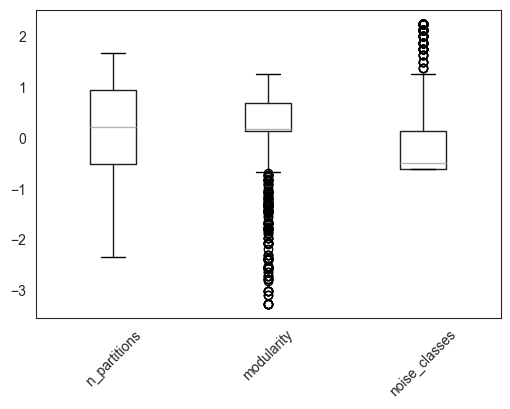

In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
outcomes_scaled = scaler.fit_transform(outcomes_df)
outcomes_scaled_df = pd.DataFrame(outcomes_scaled, columns=outcomes_df.columns)

boxplot = outcomes_scaled_df.boxplot(grid=False, figsize=(6,4), rot=45)
plt.show()

In [36]:
df = pd.concat([experiments_df, outcomes_df], axis=1) #outcomes_df.copy()
#df['resolution'] = experiments_df['resolution']

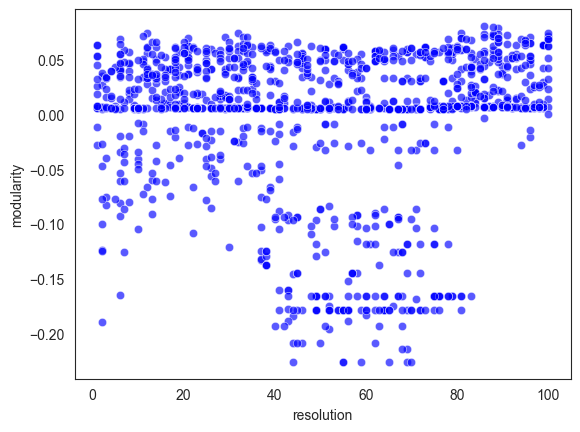

In [37]:
sns.scatterplot(data=df, x="resolution", y="modularity", alpha=0.65, color='blue')
plt.show()

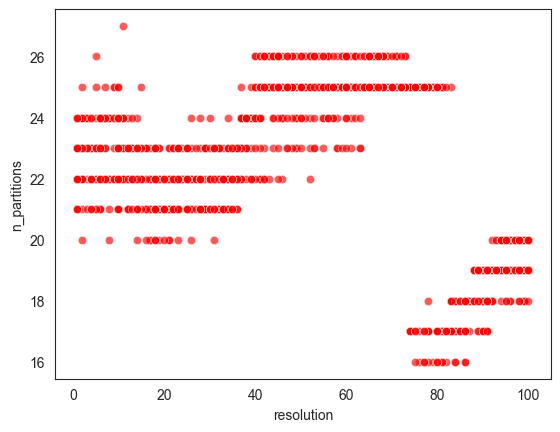

In [38]:
sns.scatterplot(data=df, x="resolution", y="n_partitions", alpha=0.65, color='red')
plt.show()

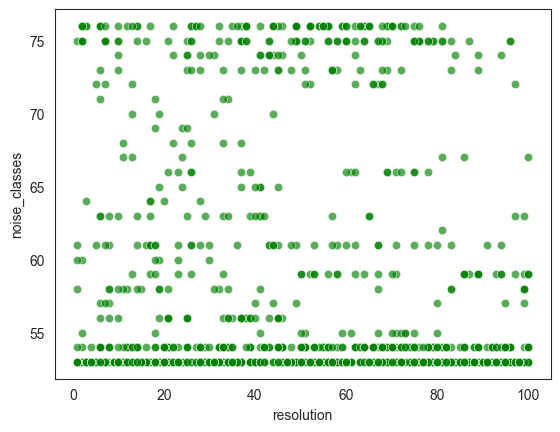

In [39]:
sns.scatterplot(data=df, x="resolution", y="noise_classes", alpha=0.65, color='green')
plt.show()

In [40]:
# Visualization of scenarios
def show_pairplot(experiments, outcomes, kind='sns', title='', group='scenario', filename=None):
    if kind == 'sns':
        data = pd.DataFrame(outcomes)
        policies = experiments['scenario']
        data['scenario'] = policies
        g = sns.pairplot(data, hue=group, vars=list(outcomes.keys()), corner=True, plot_kws={'alpha':0.25})
        g._legend.remove()
        g.fig.suptitle(title)
        if filename is not None:
            plt.savefig(filename)
        plt.show()
    if kind == 'matplotlib':
        data = experiments.copy()
        data['scenario'] = experiments['scenario'].astype(str)
        fig, axes = pairs_plotting.pairs_scatter(data, outcomes, group_by=group,legend=False)
        fig.set_size_inches(8,8)
        fig.suptitle(title)
        if filename is not None:
            plt.savefig(filename)
        plt.show()

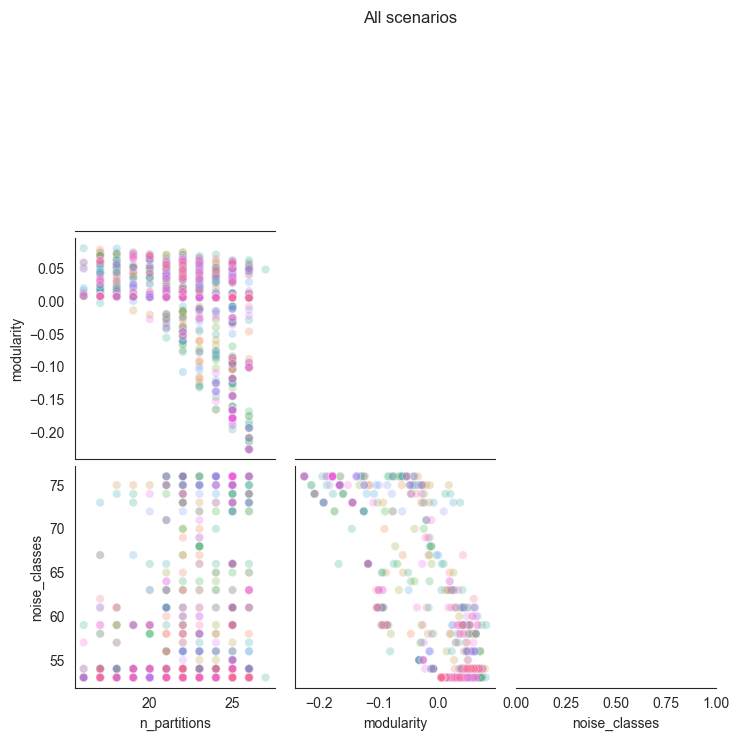

In [41]:
show_pairplot(experiments_df, outcomes, title='All scenarios', kind='sns')
#show_pairplot(experiments_df, outcomes, title='All scenarios (jpetstore)', kind='matplotlib', filename='all_scenarios_jpetstore.png')
#show_pairplot(experiments_df, outcomes, title='All scenarios (cargo)', kind='matplotlib', filename='all_scenarios_cargo.png')

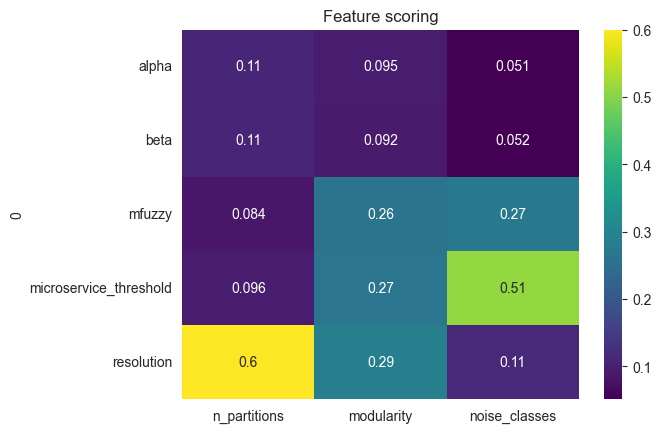

,n_partitions,modularity,noise_classes
0,,,
alpha,0.110578,0.095089,0.051031
beta,0.109278,0.091739,0.052310
mfuzzy,0.084173,0.261473,0.272602
microservice_threshold,0.095529,0.265047,0.510595
resolution,0.600442,0.286652,0.113462


In [42]:
fs = feature_scoring.get_feature_scores_all(experiments_df, outcomes) #, mode=feature_scoring.CLASSIFICATION)
sns.heatmap(fs, cmap='viridis', annot=True)
plt.title('Feature scoring')
#plt.title('Feature scoring (jpetstore)')
#plt.savefig('feature-scoring-jpetstore.png')
#plt.title('Feature scoring (cargo)')
#plt.savefig('feature-scoring-cargo.png')
plt.show()
fs

In [47]:
# For parameters
# uncertainties_problem = get_SALib_problem(model.uncertainties)
print('----', 'n_partitions')
Si_1 = sobol.analyze(uncertainties_problem, outcomes['n_partitions'], calc_second_order=True, print_to_console=True)
print('----', 'modularity')
Si_2 = sobol.analyze(uncertainties_problem, outcomes['modularity'], calc_second_order=True, print_to_console=True)
print('----', 'noise_classes')
Si_3 = sobol.analyze(uncertainties_problem, outcomes['noise_classes'], calc_second_order=True, print_to_console=True)

---- n_partitions
                              ST   ST_conf
alpha                   0.283210  0.148019
mfuzzy                  0.258668  0.135701
microservice_threshold  0.235108  0.102465
resolution              0.990007  0.168658
                              S1   S1_conf
alpha                  -0.105154  0.115115
mfuzzy                 -0.051112  0.100435
microservice_threshold -0.069513  0.109994
resolution              0.698317  0.216378
                                            S2   S2_conf
(alpha, mfuzzy)                       0.064040  0.140540
(alpha, microservice_threshold)       0.067966  0.160891
(alpha, resolution)                   0.177913  0.173705
(mfuzzy, microservice_threshold)      0.000105  0.123126
(mfuzzy, resolution)                  0.077656  0.121118
(microservice_threshold, resolution) -0.049793  0.152672
---- modularity
                              ST   ST_conf
alpha                   0.131701  0.113953
mfuzzy                  0.453803  0.208138
microser

In [44]:
def show_sobol(problem, Si, title='', filename=None):
    scores_filtered = {k:Si[k] for k in ['ST','ST_conf','S1','S1_conf']}
    Si_df = pd.DataFrame(scores_filtered, index=problem['names'])

    sns.set_style('white')
    fig, ax = plt.subplots(1)

    indices = Si_df[['S1','ST']]
    err = Si_df[['S1_conf','ST_conf']]

    indices.plot.bar(yerr=err.values.T,ax=ax)
    fig.set_size_inches(8,6)
    fig.subplots_adjust(bottom=0.3)
    plt.title(title)
    if filename is not None:
        plt.savefig(filename)
    plt.show()

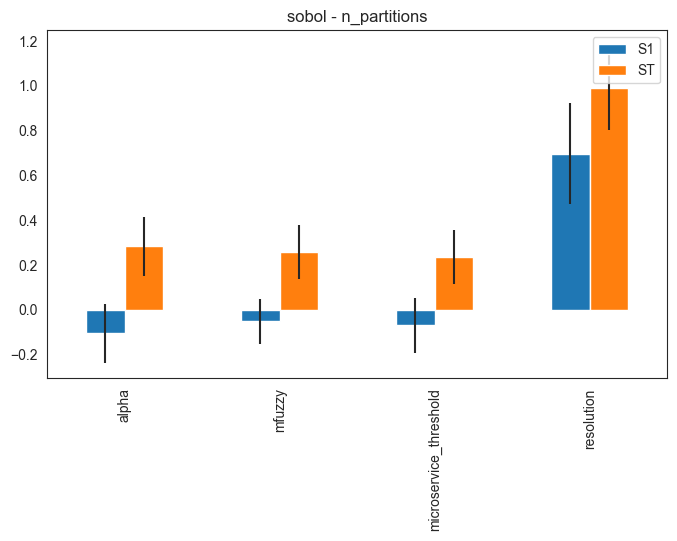

In [45]:
show_sobol(uncertainties_problem, Si_1, title='sobol - n_partitions')
#show_sobol(uncertainties_problem, Si_1, title='sobol - n_partitions (jpetstore)', filename="sobol_n_partitions_jpetstore.png")
#show_sobol(uncertainties_problem, Si_1, title='sobol - n_partitions (cargo)', filename="sobol_n_partitions_cargo.png")

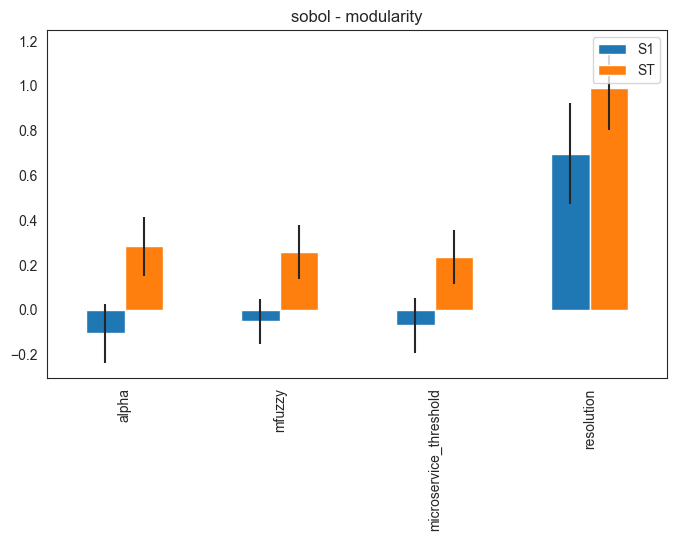

In [46]:
show_sobol(uncertainties_problem, Si_1, title='sobol - modularity')
#show_sobol(uncertainties_problem, Si_1, title='sobol - modularity (jpetstore)', filename="sobol_modularity_jpetstore.png")
#show_sobol(uncertainties_problem, Si_1, title='sobol - modularity (cargo)', filename="sobol_modularity_cargo.png")

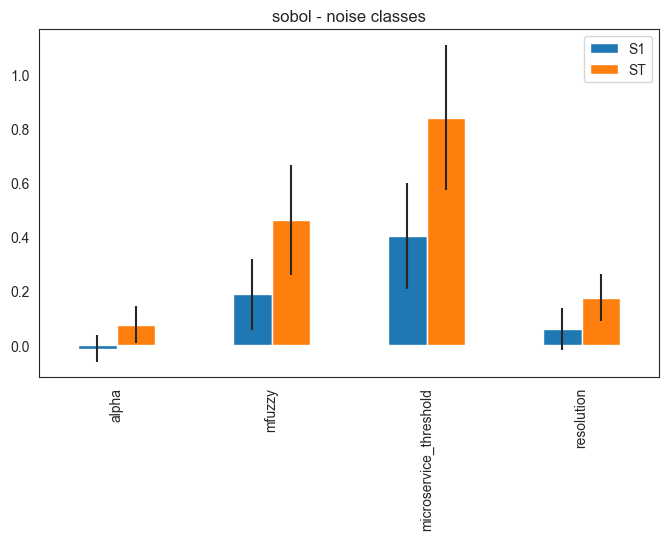

In [48]:
show_sobol(uncertainties_problem, Si_3, title='sobol - noise classes')
#show_sobol(uncertainties_problem, Si_3, title='sobol - modularity (jpetstore)', filename="sobol_noiseclasses_jpetstore.png")
#show_sobol(uncertainties_problem, Si_3, title='sobol - modularity (cargo)', filename="sobol_noiseclasses_cargo.png")